In [1]:
import sys
import os
import matplotlib.pyplot as plt
sys.path.append("../..")
from diachr import DiachromaticInteractionSet
from diachr import IaFreqDistAnalysis
from diachr import IaFreqDistAnalysis_2

# Create directory for output files generated in this notebook 
NOTEBOOK_RESULTS_DIR = 'distance_dependent_interaction_frequencies_results/rp_count_dist_tables'
%mkdir -p $NOTEBOOK_RESULTS_DIR

# Writing out the results for one cell type in one table row

The function `ia_freq_dist_analysis.write_num_table()` can be used to export all values that are shown in the top right of the histograms to two tab separated files, one file for read pair counts and one file for interaction distances. The first column contains descriptions of the rows (`DESCRIPTION`). The second column a short description (`DESCRIPTION_SHORT`).  This is followed by 60 columns, which result from the five interaction categories (`DIX`, `DI`, `UIR`, `UI`, `ALL`), four enrichment categories (`NN`, `NE`, `EN`, `EE`) and three meassured values (`N`, `MED`, `MAD`). `N` stands for the number of interactions and is identical in both tables. The last column indicates which chromosomes were taken into account (`CHROMS`). This gives a total of 63 columns.

```
DESCRIPTION   ...                           # MA_M1_RP_NUM_CHR21 or MA_M1_RP_NUM_CHR_ALL

DESCRIPTION_SHORT   ...                     # MA_M1

DIX_NN_N   DIX_NN_MED   DIX_NN_MAD   ...
DIX_NE_N   DIX_NE_MED   DIX_NE_MAD   ...
DIX_EN_N   DIX_EN_MED   DIX_EN_MAD   ...
DIX_EE_N   DIX_EE_MED   DIX_EE_MAD   ...
...
DI_NN_N   DI_EN_MED   DI_NN_MAD   ...
...
UIR_NN_N   UIR_EN_MED   UIR_NN_MAD   ...
...
UI_NN_N   UI_EN_MED   UI_NN_MAD   ...
...
ALL_NN_N   ALL_NN_MED   ALL_NN_MAD   ...
ALL_NE_N   ALL_NE_MED   ALL_NE_MAD   ...
ALL_EN_N   ALL_EN_MED   ALL_EN_MAD   ...
ALL_EE_N   ALL_EE_MED   ALL_EE_MAD

CHROMS                                       # ['chr21'] or ['chr21','chr22']

```
There is one row per chromosome and another row for all chromosomes.

In the following cell we perform the analysis with the distance-dependent interaction frequencies for all 17 cell types. However, we do not generate histograms, but export the counts and distances to tables.

In [2]:
AUTHOR = 'JAV' # MIF or JAV
PROTOCOL = 'CHC' # HC or CHC
for CELL_TYPE_SHORT in ['MK', 'ERY', 'NEU', 'MON', 'MAC_M0', 'MAC_M1', 'MAC_M2', 'EP', 'NB', 'TB', 'FOET', 'NCD4', 'TCD4', 'NACD4', 'ACD4', 'NCD8', 'TCD8']:
    
    # Select cell type
    print(CELL_TYPE_SHORT)
    OUT_PREFIX = AUTHOR + '_' + CELL_TYPE_SHORT + '_' + PROTOCOL +'_REPC'
    INTERACTION_FILE = '../../UICer_interactions/' + PROTOCOL + '/' + OUT_PREFIX + '_evaluated_and_categorized_interactions.tsv.gz'
    
    # Create DiachromaticInteractionSet and IaFreqDistAnalysis object
    print('\t' + 'Preparing data...')
    d11_interaction_set = DiachromaticInteractionSet()
    d11_interaction_set.parse_file(
        i_file = INTERACTION_FILE,
        verbose = False)
    ia_freq_dist_analysis = IaFreqDistAnalysis()
    report_dict = ia_freq_dist_analysis.ingest_interaction_set(
        d11_inter_set = d11_interaction_set,
        verbose = False)
    
    # Collect read pair counts and distances
    print('\t' + 'Collecting read pair counts and distances...')
    rp_num_dict, i_dist_dict = ia_freq_dist_analysis.get_all_rp_nums_and_i_dists(verbose = False)
    
    # Write 'RP_TOTAL' table row
    print('\t' + 'Writing \'RP_TOTAL\' table row...')
    ia_freq_dist_analysis.write_num_table(
        out_prefix = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_RP_TOTAL',
        description = CELL_TYPE_SHORT,
        verbose = False)
    
    # Re-select reference sets
    print('\t' + 'Re-selecting reference sets...')
    d11_interaction_set.deselect_reference_interactions()
    d11_interaction_set.select_reference_interactions(selection_rule='RPMAX')
    ia_freq_dist_analysis_rpmaxn = IaFreqDistAnalysis()
    report_dict = ia_freq_dist_analysis_rpmaxn.ingest_interaction_set(
        d11_inter_set = d11_interaction_set,
        verbose = False)
    
    # Collect read pair counts and distances
    print('\t' + 'Collecting read pair counts and distances...')
    rpmaxn_rp_num_dict, rpmaxn_i_dist_dict = ia_freq_dist_analysis_rpmaxn.get_all_rp_nums_and_i_dists(verbose = False)
        
    # Write 'RP_MAX' table row
    print('\t' + 'Writing \'RP_MAX\' table row...')
    ia_freq_dist_analysis_rpmaxn.write_num_table(
        out_prefix = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_RP_MAX',
        description = CELL_TYPE_SHORT,
        verbose = False)

MK
	Preparing data...
	Writing 'RP_TOTAL' table row...
	Re-selecting reference sets...
	Writing 'RP_MAX' table row...
ERY
	Preparing data...
	Writing 'RP_TOTAL' table row...
	Re-selecting reference sets...
	Writing 'RP_MAX' table row...
NEU
	Preparing data...
	Writing 'RP_TOTAL' table row...
	Re-selecting reference sets...
	Writing 'RP_MAX' table row...
MON
	Preparing data...
	Writing 'RP_TOTAL' table row...
	Re-selecting reference sets...
	Writing 'RP_MAX' table row...
MAC_M0
	Preparing data...
	Writing 'RP_TOTAL' table row...
	Re-selecting reference sets...
	Writing 'RP_MAX' table row...
MAC_M1
	Preparing data...
	Writing 'RP_TOTAL' table row...
	Re-selecting reference sets...
	Writing 'RP_MAX' table row...
MAC_M2
	Preparing data...
	Writing 'RP_TOTAL' table row...
	Re-selecting reference sets...
	Writing 'RP_MAX' table row...
EP
	Preparing data...
	Writing 'RP_TOTAL' table row...
	Re-selecting reference sets...
	Writing 'RP_MAX' table row...
NB
	Preparing data...
	Writing 'RP_TOTAL'

##  Combine results from the 17 cell types

We used the function `ia_freq_dist_analysis.write_num_table()` to export all results on read pair numbers and interaction distances for each cell type to a table. Here we read in the results for all cell types to do a higher-level analysis.

### Two (four) tables

We compiled two tables with the results on read pair counts and interaction distances and added them to the repository:

```
diachrscripts/additional_files/ia_freq_dist/rp_num_tab.txt
diachrscripts/additional_files/ia_freq_dist/i_dist_tab.txt
```

Each of these tables contains 17 rows, one for each cell type taking into account all chromosomes (last row of each individual file).

### Reading a table

For the sake of clarity, we have created a second class `IaFreqDistAnalysis_2` for the combined analyzes of different cell types. The table with the median interaction distances is passed to the constructor.

In [ ]:
i_dist_rp_max_tab.txt
i_dist_rp_total_tab.txt
rp_num_rp_max_tab.txt
rp_num_rp_total_tab.txt

In [35]:
#INPUT_TABLE_PATH = '../../additional_files/ia_freq_dist/rp_num_rp_total_tab.txt'
INPUT_TABLE_PATH = '../../additional_files/ia_freq_dist/i_dist_rp_total_tab.txt'
#INPUT_TABLE_PATH = '../../additional_files/ia_freq_dist/rp_num_rp_max_tab.txt'
#INPUT_TABLE_PATH = '../../additional_files/ia_freq_dist/i_dist_rp_max_tab.txt'
ia_freq_dist_analysis_2 = IaFreqDistAnalysis_2(input_table_path = INPUT_TABLE_PATH)

The data is read into a dictionary grouped by interaction category and enrichment state.

In [7]:
#ia_freq_dist_analysis_2._grouped_numbers

### Create scatterplot for interaction distances

The function `create_i_dist_scatterplot` can then be used to generate scatterplots for all combinations of interaction categories and enrichmentstates.

P-value: 1.53e-05
Test statistic: 0.00
Average difference of medians: -158,608


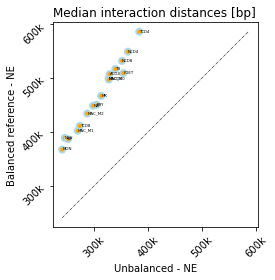

In [38]:
i_cat_1 = 'DI'
i_cat_2 = 'UIR'
e_cat_1 = 'NE'
e_cat_2 = 'NE'
m_type = 'MED'
fig = ia_freq_dist_analysis_2.create_i_dist_scatterplot(
    i_cat_1 = i_cat_1,
    i_cat_2 = i_cat_2,
    e_cat_1 = e_cat_1,
    e_cat_2 = e_cat_2,
    m_type = m_type,
    pdf_file_name='i_dist_scatterplot_' + i_cat_1 + '_' + e_cat_1 + '_' + i_cat_2 + '_' + e_cat_2 + '_' + m_type + '.pdf'
)